In [1]:
import yolov5

# load pretrained model
#model = yolov5.load('yolov5s.pt')

# or load custom model
model = yolov5.load('yolov5/signatureyolo.pt')

YOLOv5  2024-7-22 Python-3.8.10 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5x summary: 607 layers, 87251103 parameters, 0 gradients
Adding AutoShape... 


In [2]:
# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

from PIL import Image, ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
        
img = Image.open('yolov5/signature1.png')
img = Image.open('yolov5/signature2.jpg')
img = trim(img)

In [3]:
# perform inference
results = model(img)

# inference with larger input size
#results = model(img, size=1280)

# inference with test time augmentation
#results = model(img, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

In [4]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,301.430145,752.715027,548.487122,824.872375,0.862513,1,DLSignature
1,439.388000,350.940582,616.248352,426.627045,0.673521,1,DLSignature
2,99.573196,471.643127,398.869232,570.018311,0.564354,1,DLSignature
3,445.086029,434.727081,702.958984,506.527313,0.472515,1,DLSignature


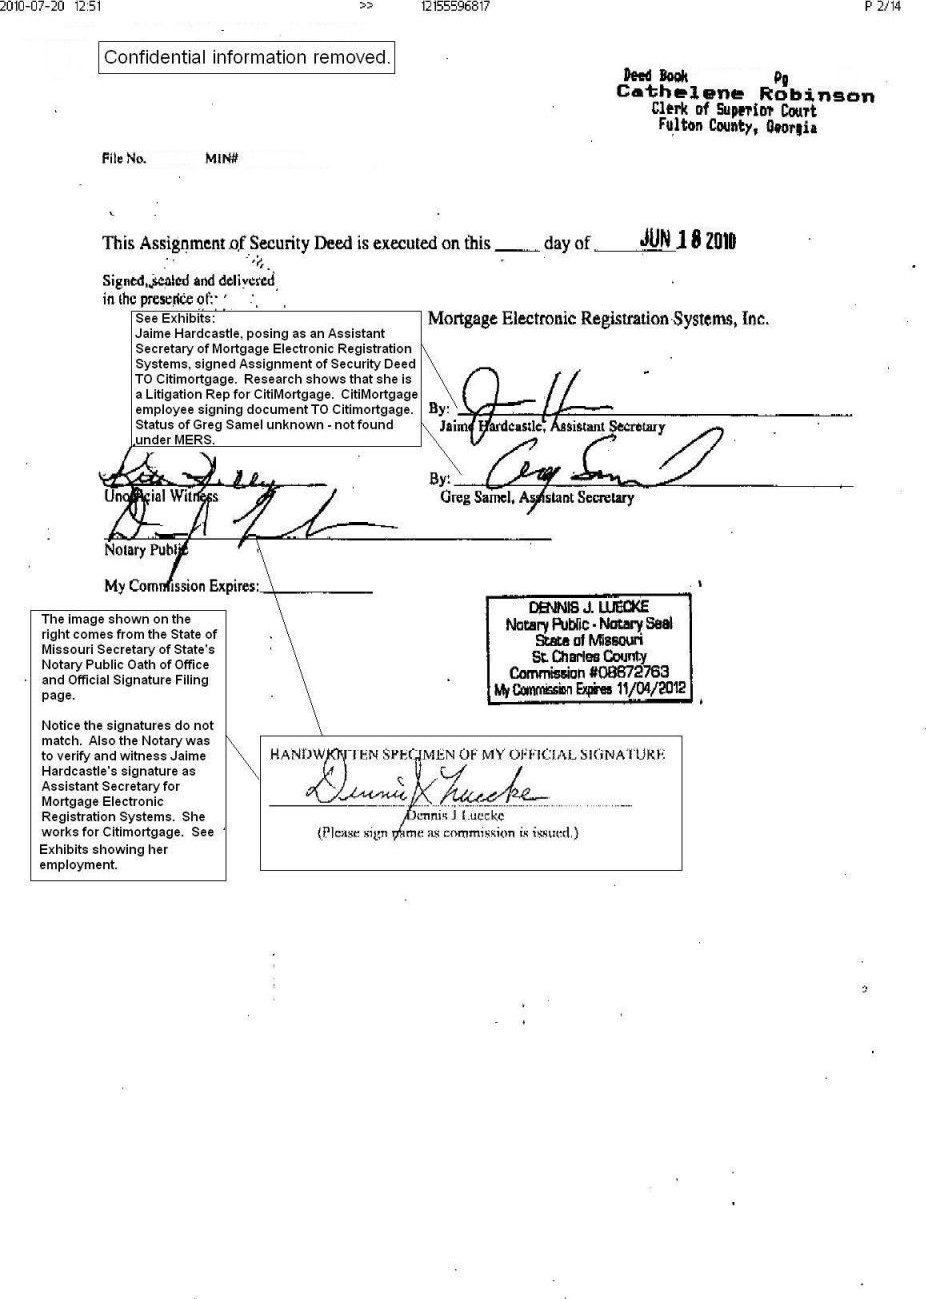

In [5]:
Image.fromarray(results.ims[0])

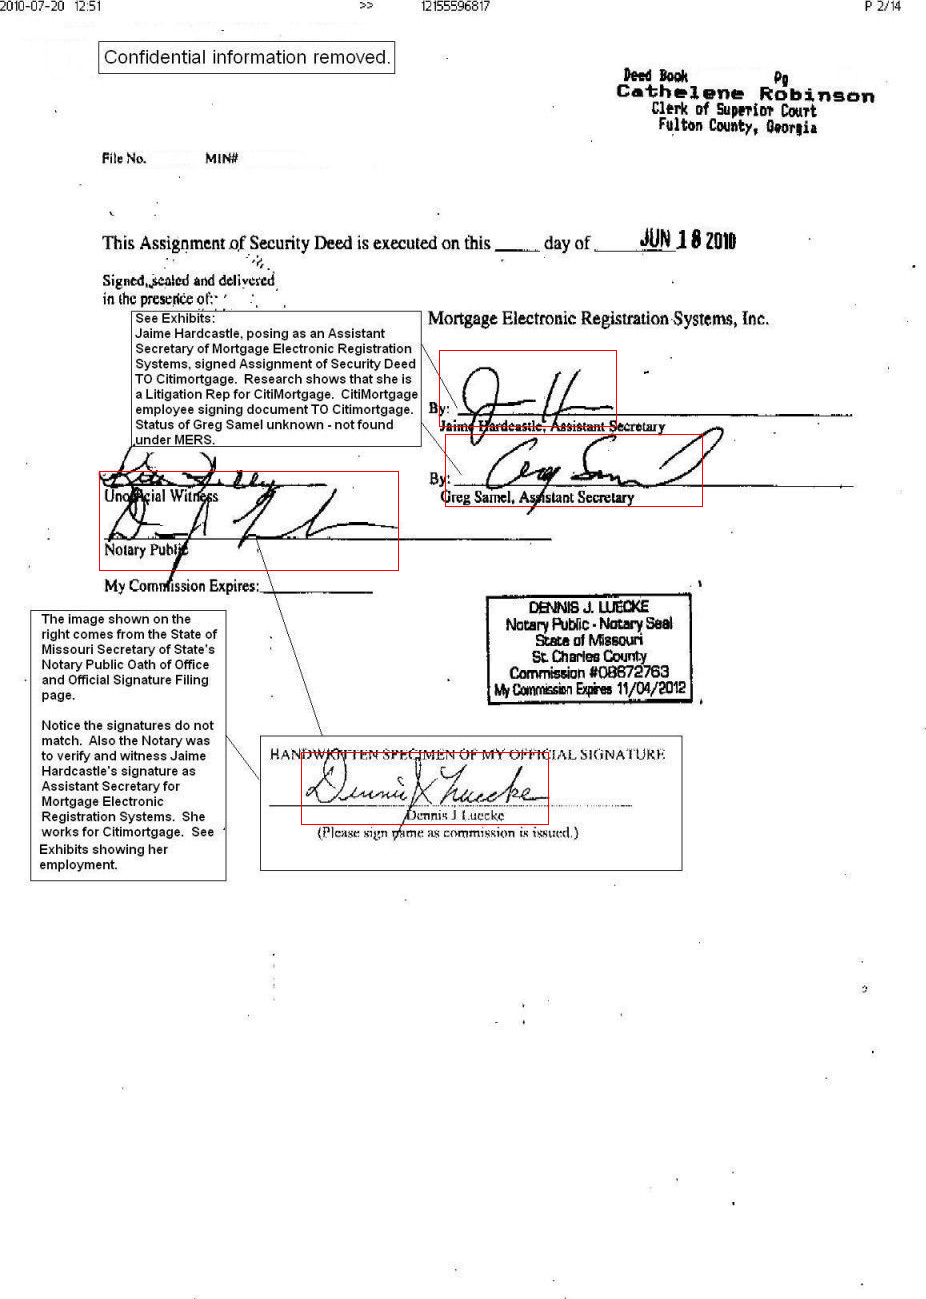

In [6]:
from PIL import ImageDraw
import numpy as np

imageDraw = Image.fromarray(results.ims[0])
draw = ImageDraw.Draw(imageDraw)

for df in results.pandas().xyxy:
    for i, row in df.iterrows():
        xmin = int(row['xmin'])
        ymin = int(row['ymin'])
        xmax = int(row['xmax'])
        ymax = int(row['ymax'])
        draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
        #draw.text((xmin, ymin), f"", fill="black")
imageDraw